In [302]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.close("all")
print(pd.__version__)

1.2.0


In [303]:
def load_loss(file:str)->pd.DataFrame:
    loss_log = pd.read_csv(file, header=None)
    cols = ["train_lr", "train_loss", "test_loss", "test_acc1", "test_acc5", 'epoch', "n_parameters"]
    loss_log = loss_log.set_axis(cols, axis='columns')

    for col in cols:
        if col == "n_parameters":
            loss_log[col] = loss_log[col].str.strip('}').str.split(':').apply(pd.Series).iloc[:,1].astype('int')
            # continue
        else:
            loss_log[col] = loss_log[col].str.split(':').apply(pd.Series).iloc[:,1].astype('float')
    return loss_log

def plot_loss(loss_log, figsize:tuple=(20,3)):
    start = loss_log.query('epoch==0').index[-1]
    loss_log_ = loss_log.loc[start:].set_index('epoch')

    figsize:tuple=(20,3)
    plt.figure( )

    ax = loss_log_[['train_lr', 'train_loss','test_loss']].plot(secondary_y=['train_lr'], figsize=figsize, grid=True, logy=True)
    ax.set_ylabel("loss")
    ax.set_xlabel("epoch")
    ax.right_ax.set_ylabel("lr");

    plt.figure()
    ax = loss_log_[['train_lr', 'test_acc1', 'test_acc5']].plot(secondary_y=['train_lr'], figsize=figsize, grid=True, logy=False)
    ax.set_ylabel("accu")
    ax.set_xlabel("epoch")
    ax.right_ax.set_ylabel("lr");


In [304]:
file = 'log_ImageNetPretrain.txt'
loss_log_Img = load_loss(file)
loss_log_Img

,train_lr,train_loss,test_loss,test_acc1,test_acc5,epoch,n_parameters
0,0.307382,7.303788,7.210949,0.322819,1.277826,0.0,1142734
1,0.947225,7.031481,6.819241,1.136593,4.559823,1.0,1142734
2,1.587069,6.645206,6.441142,2.380792,7.861995,2.0,1142734
3,2.226913,6.325162,6.153836,3.746049,10.962405,3.0,1142734
4,2.866757,6.068959,5.917373,4.949896,13.739996,4.0,1142734
...,...,...,...,...,...,...,...
85,0.050459,3.601254,3.967641,24.177820,45.181251,85.0,1142734
86,0.030713,3.592328,3.968103,24.144194,45.187977,86.0,1142734
87,0.015852,3.593513,3.966157,24.137468,45.194702,87.0,1142734
88,0.005900,3.595918,3.968485,24.097116,45.187977,88.0,1142734


<Figure size 432x288 with 0 Axes>

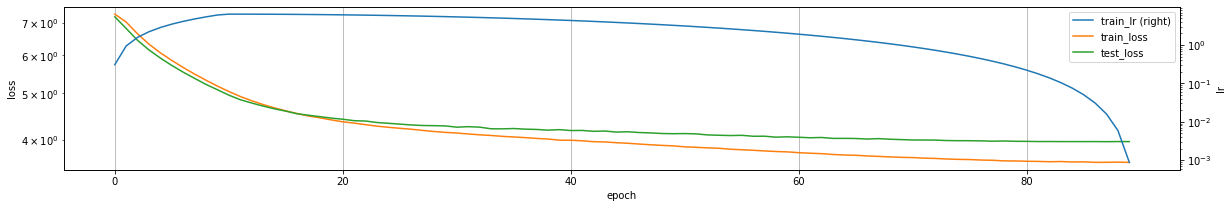

<Figure size 432x288 with 0 Axes>

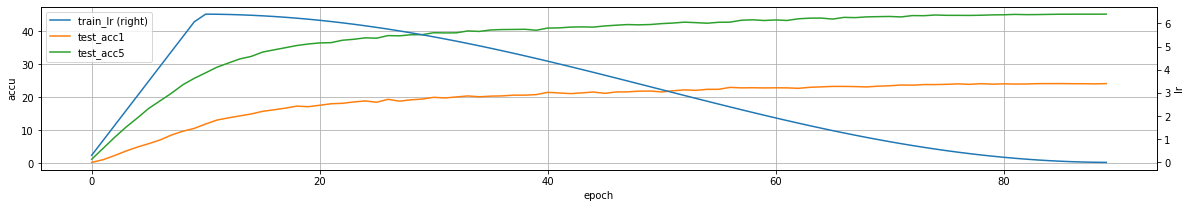

In [305]:
plot_loss(loss_log_Img)

In [306]:
file = 'log_EbirdPretrain.txt'
loss_log_Ebird = load_loss(file)
loss_log_Ebird

,train_lr,train_loss,test_loss,test_acc1,test_acc5,epoch,n_parameters
0,0.019951,7.320787,7.327820,0.086430,0.440795,0.0,1142734
1,0.059951,7.209063,7.313085,0.138289,0.484010,1.0,1142734
2,0.099951,7.009021,7.311049,0.103717,0.561798,2.0,1142734
3,0.139951,6.763206,7.338657,0.095073,0.492653,3.0,1142734
4,0.179951,6.509092,7.401634,0.095073,0.475367,4.0,1142734
...,...,...,...,...,...,...,...
293,2.035566,2.614199,2.912083,39.390680,63.662656,59.0,1142734
294,1.919474,2.599837,2.906224,39.679873,63.413817,60.0,1142734
295,1.805356,2.586634,2.901533,39.652971,63.474344,61.0,1142734
296,1.693386,2.580529,2.896030,39.652972,63.649206,62.0,1142734


<Figure size 432x288 with 0 Axes>

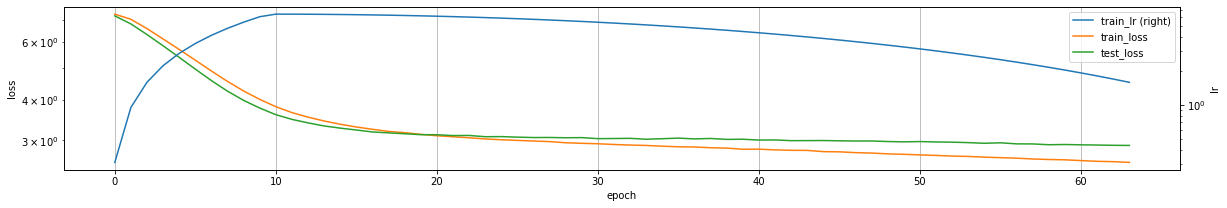

<Figure size 432x288 with 0 Axes>

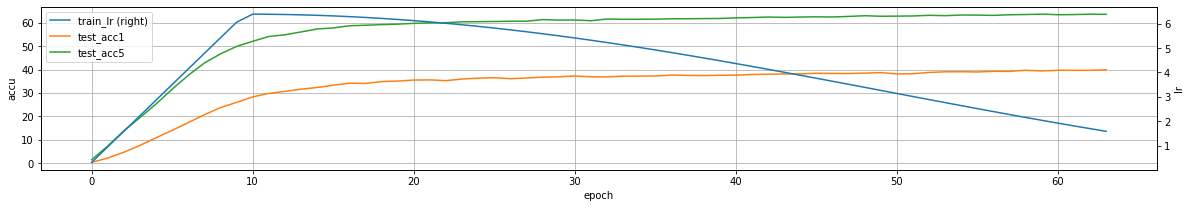

In [307]:
plot_loss(loss_log_Ebird)

<Figure size 432x288 with 0 Axes>

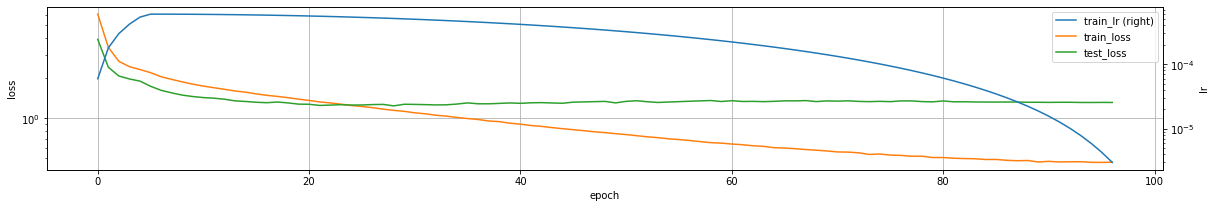

<Figure size 432x288 with 0 Axes>

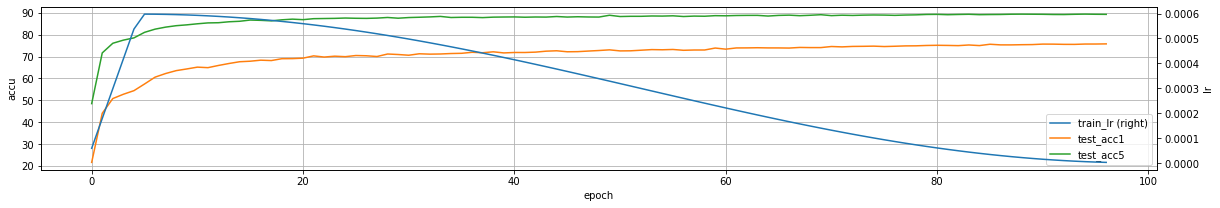

In [331]:
file = 'log_resnet50.txt'
loss_log_resnet = load_loss(file)
# loss_log_resnet
plot_loss(loss_log_resnet)

#### Compare models

In [333]:
# Compare models
def get_lastlog(loss_log):
    start = loss_log.query('epoch==0').index[-1]
    return loss_log.loc[start:].set_index('epoch')

logs_  =  [loss_log_Ebird, loss_log_Img, loss_log_resnet]
loss_logs = [get_lastlog(loss_log).test_acc1 for loss_log in logs_ ]

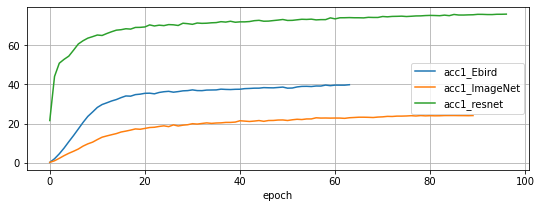

In [334]:
compare = (pd.concat(loss_logs, axis=1).
           set_axis(['acc1_Ebird', 'acc1_ImageNet', 'acc1_resnet'], axis='columns')
          )
compare.plot(grid=True, figsize=(9,3));

In [335]:
loss_log_resnet

,train_lr,train_loss,test_loss,test_acc1,test_acc5,epoch,n_parameters
0,0.000205,7.037141,6.667678,0.827058,3.294782,0.0,26552846
1,0.000615,6.371525,6.003023,2.649274,9.373319,1.0,26552846
2,0.001025,5.676866,5.145388,8.196611,22.001076,2.0,26552846
3,0.001435,4.919317,4.465654,15.626681,35.307961,3.0,26552846
4,0.001845,4.256224,3.801523,23.271920,46.624529,4.0,26552846
...,...,...,...,...,...,...,...
97,0.000010,0.470587,1.319380,75.611890,89.241529,92.0,26552846
98,0.000008,0.471094,1.315119,75.598442,89.355839,93.0,26552846
99,0.000006,0.466264,1.314858,75.753095,89.429803,94.0,26552846
100,0.000004,0.465693,1.316380,75.759819,89.362563,95.0,26552846
